In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_excel("/home/user/Desktop/env2/VAR/Rates without SOFR.xlsx")
df=df[["Date","LIBOR ON","SONIA DAILY RATE","TIIE DAILY AVG RATES"]]
df.tail()

,Date,LIBOR ON,SONIA DAILY RATE,TIIE DAILY AVG RATES
1339,31.03.2021,0.07288,0.0475,4.20
1340,01.04.2021,0.07475,0.0475,NaN
1341,05.04.2021,0.07475,0.0482,4.06
1342,06.04.2021,0.07788,0.0483,4.03
1343,07.04.2021,0.07625,0.0483,4.01


In [3]:
df.index=df["Date"]


In [4]:
df.drop("Date",axis=1,inplace=True)

In [5]:
df.tail()

,LIBOR ON,SONIA DAILY RATE,TIIE DAILY AVG RATES
Date,,,
31.03.2021,0.07288,0.0475,4.20
01.04.2021,0.07475,0.0475,NaN
05.04.2021,0.07475,0.0482,4.06
06.04.2021,0.07788,0.0483,4.03
07.04.2021,0.07625,0.0483,4.01


In [6]:
df.ffill(axis=0,inplace=True)

In [7]:
def normalize(df,col):
    df=df.copy()
    return (df[col]-df[col].min())/(df[col].max()-df[col].min())

In [8]:
df["libor_norm"]=normalize(df,"LIBOR ON")
# df["SOFR_norm"]=normalize(df,"SOFR Rate")
df["SONIA_norm"]=normalize(df,"SONIA DAILY RATE")
df["TIIE_norm"]=normalize(df,"TIIE DAILY AVG RATES")

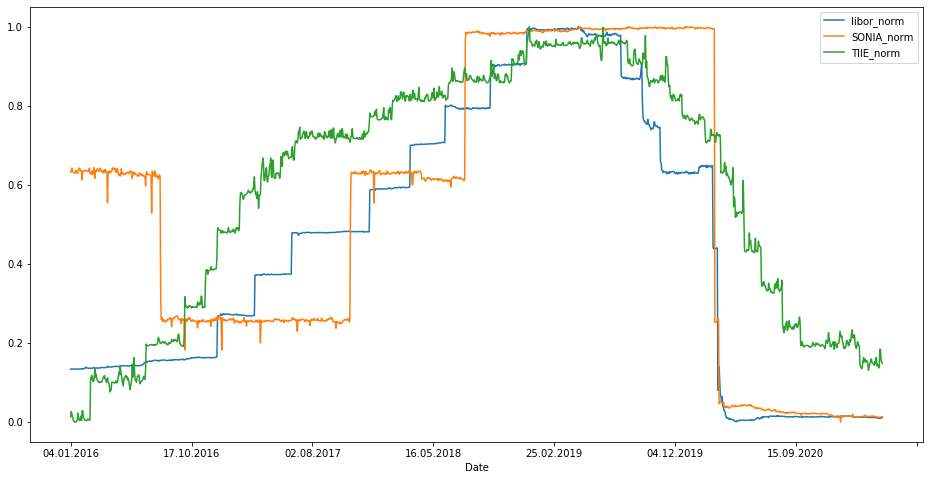

In [9]:
plt.figure(figsize=(16,8))
df["libor_norm"].plot(legend=True)
# df["SOFR_norm"].plot(legend=True)
df["SONIA_norm"].plot(legend=True)
df["TIIE_norm"].plot(legend=True)

In [10]:
def variance(data):
# Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance,math.sqrt(variance)

In [11]:
variance(df["LIBOR ON"])

(0.6582736276929929, 0.8113406360419728)

In [12]:
df["%changeLIBOR"]=df["LIBOR ON"].pct_change().rolling(20).std()*(252**0.5)
# df["%changeSOFR"]=df["SOFR Rate].pct_change().rolling(20).std()*(252**0.5)
df["%changeSONIA"]=df["SONIA DAILY RATE"].pct_change().rolling(20).std()*(252**0.5)
df["%changeTIIA"]=df["TIIE DAILY AVG RATES"].pct_change().rolling(20).std()*(252**0.5)

In [13]:
df["%changeLIBOR"]=normalize(df,"%changeLIBOR")
# df["%changeSOFR"]=normalize(df,"%changeSOFR")
df["%changeSONIA"]=normalize(df,"%changeSONIA")
df["%changeTIIA"]=normalize(df,"%changeTIIA")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS SONIA')

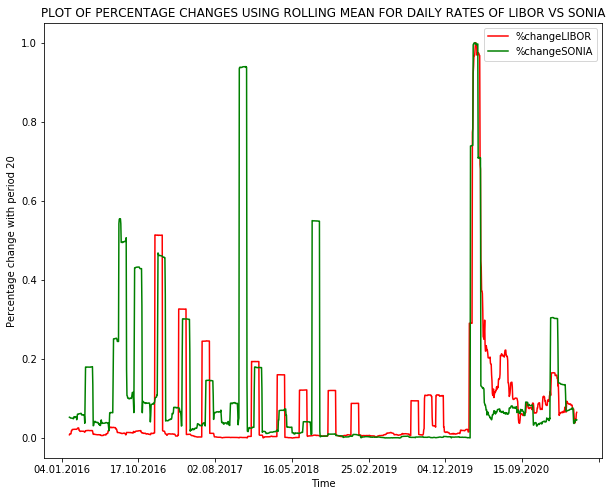

In [14]:
plt.figure(figsize=(10,8))

df["%changeLIBOR"].plot(color='red',legend=True)
# df["%changeSOFR"].plot(legend=True)
df["%changeSONIA"].plot(color='green',legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS SONIA")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS SONIA')

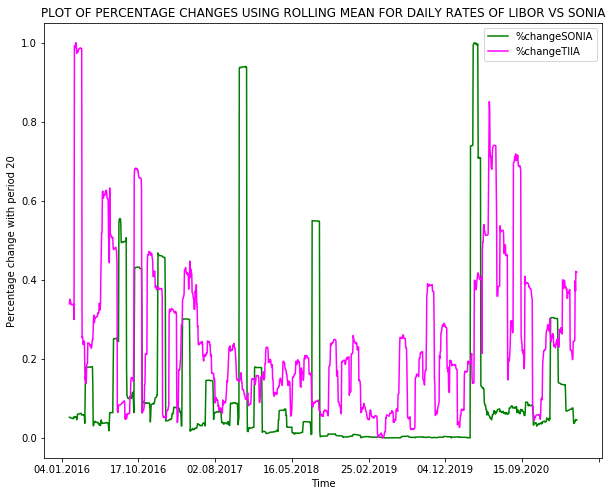

In [15]:
plt.figure(figsize=(10,8))
df["%changeSONIA"].plot(color='green',legend=True)
df["%changeTIIA"].plot(color='magenta',legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS SONIA")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS TIIE')

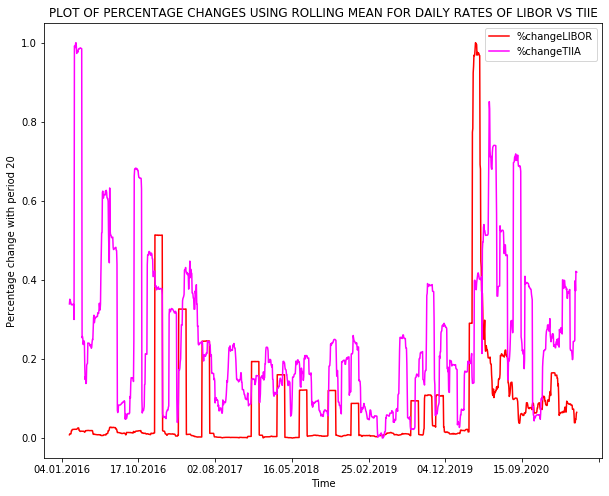

In [16]:
plt.figure(figsize=(10,8))
df["%changeLIBOR"].plot(color='red',legend=True)
df["%changeTIIA"].plot(color='magenta',legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS TIIE")